In [145]:
IS_LOCAL = False
import numpy as np
import pandas as pd
from skimage.io import imread
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import pydicom as dicom
import os
import cv2

In [146]:
def process_data(path):
    data = pd.DataFrame([{'path': filepath} for filepath in glob(PATH+path)])
    data['file'] = data['path'].map(os.path.basename)
    data['ID'] = data['file'].map(lambda x: str(x.split('_')[1]))
    data['Age'] = data['file'].map(lambda x: int(x.split('_')[3]))
    data['Contrast'] = data['file'].map(lambda x: bool(int(x.split('_')[5])))
    data['Modality'] = data['file'].map(lambda x: str(x.split('_')[6].split('.')[-2]))
    return data
def countplot_comparison(feature):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20, 4))
    s1 = sns.countplot(data_df[feature], ax=ax1)
    s1.set_title("Overview data")
    s2 = sns.countplot(tiff_data[feature], ax=ax2)
    s2.set_title("Tiff files data")
    s3 = sns.countplot(dicom_data[feature], ax=ax3)
    s3.set_title("Dicom files data")
    plt.show()
def show_images(data, dim=16, imtype='TIFF'):
    img_data = list(data[:dim].T.to_dict().values())
    f, ax = plt.subplots(4,4, figsize=(16,20))
    for i,data_row in enumerate(img_data):
        if(imtype=='TIFF'): 
            data_row_img = imread(data_row['path'])
        elif(imtype=='DICOM'):
            data_row_img = dicom.read_file(data_row['path'])
        if(imtype=='TIFF'):
            ax[i//4, i%4].matshow(data_row_img,cmap='gray')
        elif(imtype=='DICOM'):
            ax[i//4, i%4].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title('Modality: {Modality} Age: {Age}\nSlice: {ID} Contrast: {Contrast}'.format(**data_row))
    plt.show()
def show_dicom_images(data):
    img_data = list(data[:16].T.to_dict().values())
    f, ax = plt.subplots(4,4, figsize=(16,20))
    for i,data_row in enumerate(img_data):

        data_row_img = dicom.read_file(data_row['path'])
        modality = data_row_img.Modality
        age = data_row_img.PatientAge
        
        ax[i//4, i%4].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title('Modality: {} Age: {}\nSlice: {} Contrast: {}'.format(
         modality, age, data_row['ID'], data_row['Contrast']))
    plt.show()

In [147]:
# df = pd.read_csv("datasets/ct_scans/overview.csv")
PATH="datasets/ct_scans/"

print(os.listdir(PATH))
df = pd.read_csv(os.path.join(PATH,"overview.csv"))

['dicom_dir', 'full_archive.npz', 'overview.csv', 'tiff_images']


In [148]:
display(df.head())
print("CT Medical images -  rows:",df.shape[0]," columns:", df.shape[1])
print("Number of TIFF images:", len(os.listdir(os.path.join(PATH,"tiff_images"))))
tiff_data = pd.DataFrame([{'path': filepath} for filepath in glob(PATH+'tiff_images/*.tif')])
tiff_data = process_data('tiff_images/*.tif')
display(tiff_data.head())

,Unnamed: 0,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
0,0,60,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (1).dcm,0,ID_0000_AGE_0060_CONTRAST_1_CT.tif,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,1,69,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (10).dcm,1,ID_0001_AGE_0069_CONTRAST_1_CT.tif,ID_0001_AGE_0069_CONTRAST_1_CT.dcm
2,2,74,True,APPLIED,../data/50_50_dicom_cases\Contrast\00001 (11).dcm,2,ID_0002_AGE_0074_CONTRAST_1_CT.tif,ID_0002_AGE_0074_CONTRAST_1_CT.dcm
3,3,75,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (12).dcm,3,ID_0003_AGE_0075_CONTRAST_1_CT.tif,ID_0003_AGE_0075_CONTRAST_1_CT.dcm
4,4,56,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (13).dcm,4,ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.dcm


CT Medical images -  rows: 100  columns: 8
Number of TIFF images: 100


,path,file,ID,Age,Contrast,Modality
0,datasets/ct_scans/tiff_images/ID_0000_AGE_0060...,ID_0000_AGE_0060_CONTRAST_1_CT.tif,0000,60,True,CT
1,datasets/ct_scans/tiff_images/ID_0001_AGE_0069...,ID_0001_AGE_0069_CONTRAST_1_CT.tif,0001,69,True,CT
2,datasets/ct_scans/tiff_images/ID_0002_AGE_0074...,ID_0002_AGE_0074_CONTRAST_1_CT.tif,0002,74,True,CT
3,datasets/ct_scans/tiff_images/ID_0003_AGE_0075...,ID_0003_AGE_0075_CONTRAST_1_CT.tif,0003,75,True,CT
4,datasets/ct_scans/tiff_images/ID_0004_AGE_0056...,ID_0004_AGE_0056_CONTRAST_1_CT.tif,0004,56,True,CT


In [149]:
print("Number of DICOM files:", len(os.listdir(PATH+"dicom_dir")))
dicom_data = process_data('dicom_dir/*.dcm')
dicom_data.head(10)

Number of DICOM files: 100


,path,file,ID,Age,Contrast,Modality
0,datasets/ct_scans/dicom_dir/ID_0000_AGE_0060_C...,ID_0000_AGE_0060_CONTRAST_1_CT.dcm,0000,60,True,CT
1,datasets/ct_scans/dicom_dir/ID_0001_AGE_0069_C...,ID_0001_AGE_0069_CONTRAST_1_CT.dcm,0001,69,True,CT
2,datasets/ct_scans/dicom_dir/ID_0002_AGE_0074_C...,ID_0002_AGE_0074_CONTRAST_1_CT.dcm,0002,74,True,CT
3,datasets/ct_scans/dicom_dir/ID_0003_AGE_0075_C...,ID_0003_AGE_0075_CONTRAST_1_CT.dcm,0003,75,True,CT
4,datasets/ct_scans/dicom_dir/ID_0004_AGE_0056_C...,ID_0004_AGE_0056_CONTRAST_1_CT.dcm,0004,56,True,CT
5,datasets/ct_scans/dicom_dir/ID_0005_AGE_0048_C...,ID_0005_AGE_0048_CONTRAST_1_CT.dcm,0005,48,True,CT
6,datasets/ct_scans/dicom_dir/ID_0006_AGE_0075_C...,ID_0006_AGE_0075_CONTRAST_1_CT.dcm,0006,75,True,CT
7,datasets/ct_scans/dicom_dir/ID_0007_AGE_0061_C...,ID_0007_AGE_0061_CONTRAST_1_CT.dcm,0007,61,True,CT
8,datasets/ct_scans/dicom_dir/ID_0008_AGE_0051_C...,ID_0008_AGE_0051_CONTRAST_1_CT.dcm,0008,51,True,CT
9,datasets/ct_scans/dicom_dir/ID_0009_AGE_0048_C...,ID_0009_AGE_0048_CONTRAST_1_CT.dcm,0009,48,True,CT


/mnt/c/Users/legen/Desktop/MSC/Deep Learning/Projects/Project 1/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/mnt/c/Users/legen/Desktop/MSC/Deep Learning/Projects/Project 1/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/mnt/c/Users/legen/Desktop/MSC/Deep Learning/Projects/Project 1/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will

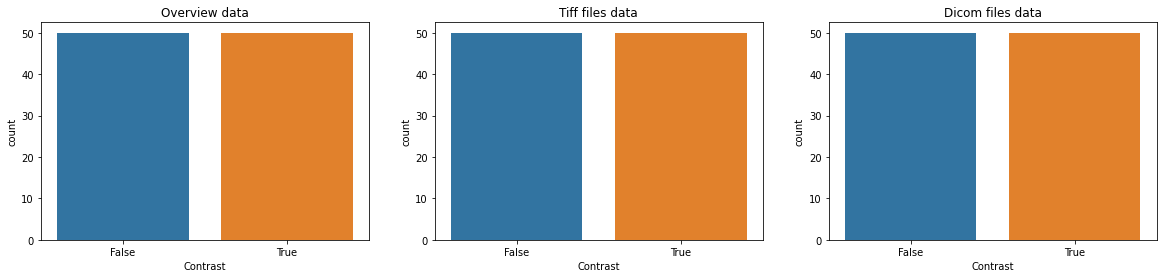

/mnt/c/Users/legen/Desktop/MSC/Deep Learning/Projects/Project 1/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/mnt/c/Users/legen/Desktop/MSC/Deep Learning/Projects/Project 1/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/mnt/c/Users/legen/Desktop/MSC/Deep Learning/Projects/Project 1/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will

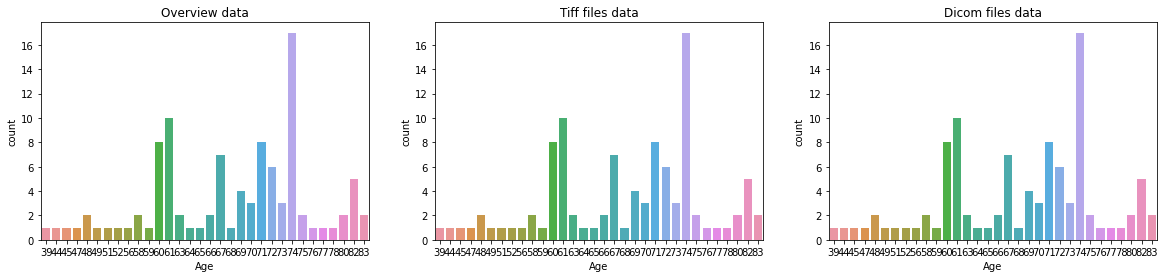

In [150]:
countplot_comparison('Contrast')
countplot_comparison('Age')

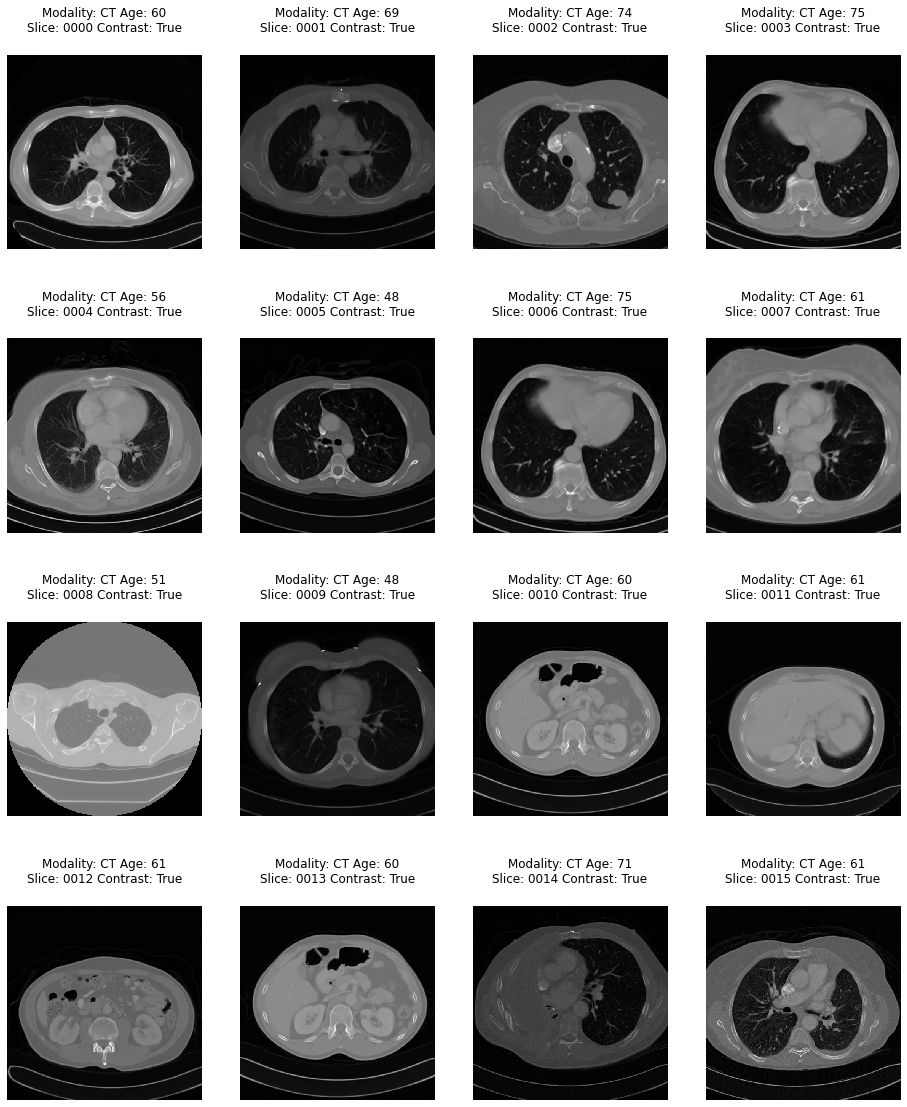

In [151]:
show_images(tiff_data,16,'TIFF')

In [152]:
dicom_file_path = list(dicom_data[:1].T.to_dict().values())[0]['path']
# dicom_file_path
dicom_file_dataset = dicom.read_file(dicom_file_path)
# dicom_file_dataset
print("Modality: {}\nManufacturer: {}\nPatient Age: {}\nPatient Sex: {}\nPatient Name: {}\nPatient ID: {}".format(
    dicom_file_dataset.Modality, 
    dicom_file_dataset.Manufacturer,
    dicom_file_dataset.PatientAge,
    dicom_file_dataset.PatientSex,
    dicom_file_dataset.PatientName,
    dicom_file_dataset.PatientID))

Modality: CT
Manufacturer: SIEMENS
Patient Age: 060Y
Patient Sex: M
Patient Name: TCGA-17-Z034
Patient ID: TCGA-17-Z034


In [153]:
# READ DICOM IMAGE SCANS AND APPEND THEM TO A LIST
images = []
dicom_path = PATH
for file in os.listdir(PATH+"dicom_dir"):
#     print (os.listdir(PATH+"dicom_dir"))
    f = dicom.read_file(os.path.join(PATH+"/dicom_dir/",file)).pixel_array
    fr = cv2.resize(f,(256,256))
    images.append(fr)

In [156]:
# 100 IMAGES OF 256 x 256 PIXELS
X = np.array(images)
print(X.shape)

(100, 256, 256)


In [164]:
# GET LABELS OF THE SCANS ()
labels = []
for file in os.listdir(PATH+"dicom_dir"):
    # FILE NAME EXAMPLE ID_0078_AGE_0066_CONTRAST_0_CT.dcm WHERE _0_ SIGNALS LABEL
    labels.append(file.split('_')[-2])
#     print (file)
Y = np.array(labels)
Y.shape

(100,)